In [ ]:
import pandas as pd 
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

from skimage.color import rgb2lab,lab2rgb,gray2rgb
from skimage.io import imsave
from skimage.transform import resize
from skimage.io import imshow

from keras.datasets import mnist
from keras.layers import Input,Dense,Reshape,Flatten,UpSampling2D,Conv2D
from keras.models import Sequential,Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img,ImageDataGenerator,img_to_array
import os 
from keras.applications.vgg16 import preprocess_input

In [ ]:
vggmodel=VGG16()


553467904/553467096 [==============================] - 10s 0us/step


In [ ]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
a=[10,20,30,40,50]
for i,k in enumerate(a):
  print (i,k)

0 10
1 20
2 30
3 40
4 50


In [ ]:
new_model=Sequential()
for i,layer in enumerate(vggmodel.layers):
  if i<19:
    new_model.add(layer) 

In [ ]:
new_model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
new_model.trainable=False

In [ ]:
path="/content/drive/MyDrive/Dataset_auto" 

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train=train_datagen.flow_from_directory(path,color_mode="rgb",follow_links=True)

Found 338 images belonging to 1 classes.


In [ ]:
train=train_datagen.flow_from_directory(
        path,
        target_size=(224,224),
        
        class_mode=None)

Found 338 images belonging to 1 classes.


In [ ]:
train_datagen.flow_from_directory?

In [ ]:
x=[]
y=[]

for img in train[0]:
      lab=rgb2lab(img)
      x.append(lab[:,:,0])
      y.append(lab[:,:,1:]/128)

x=np.array(x)
y=np.array(y)

In [ ]:
x=x.reshape(x.shape+(1,))


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


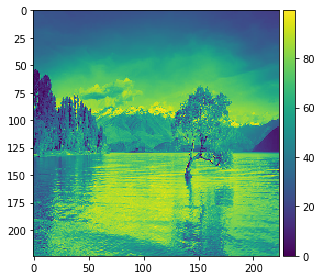

In [ ]:
imshow([0])



In [ ]:
vggfeatures=[]

for i,sample in enumerate(x):
  sample=gray2rgb(sample)
  sample=sample.reshape((1,224,224,3))
  prediction=new_model.predict(sample)
  prediction=prediction.reshape((7,7,512))
  vggfeatures.append(prediction)

vggfeatures=np.array(vggfeatures)  
vggfeatures.shape

(32, 7, 7, 512)

In [ ]:
model=Sequential()

model.add(Conv2D(256,(3,3),padding="same",activation='relu',input_shape=(7,7,512)))
model.add(Conv2D(128,(3,3),activation='relu',padding="same"))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding="same"))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',padding="same"))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(16,(3,3),activation='relu',padding="same"))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(2,(3,3),activation='tanh',padding="same"))
model.add(UpSampling2D((2,2)))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 7, 256)         1179904   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         295040    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 56, 56, 32)       

In [ ]:
model.compile(optimizer="Adam",loss="mse",metrics=['accuracy'])
model.fit(vggfeatures,y,epochs=10000)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
1/1 [==============================] - 0s 23ms/step - loss: 0.0018 - accuracy: 0.9250
Epoch 7502/10000
1/1 [==============================] - 0s 30ms/step - loss: 0.0018 - accuracy: 0.9255
Epoch 7503/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0018 - accuracy: 0.9251
Epoch 7504/10000
1/1 [==============================] - 0s 34ms/step - loss: 0.0018 - accuracy: 0.9251
Epoch 7505/10000
1/1 [==============================] - 0s 25ms/step - loss: 0.0018 - accuracy: 0.9254
Epoch 7506/10000
1/1 [==============================] - 0s 27ms/step - loss: 0.0018 - accuracy: 0.9254
Epoch 7507/10000
1/1 [==============================] - 0s 26ms/step - loss: 0.0018 - accuracy: 0.9252
Epoch 7508/10000
1/1 [==============================] - 0s 25ms/step - loss: 0.0018 - accuracy: 0.9255
Epoch 7509/10000
1/1 [==============================] - 0s 31ms/step - loss: 0.0018 - accuracy: 0.9252
Epoch 7510/10000
1/1 [

In [ ]:
model.save("colorize_autoencoder_VGG16_10000.model")

INFO:tensorflow:Assets written to: colorize_autoencoder_VGG16_10000.model/assets


In [ ]:
model = tf.keras.models.load_model('colorize_autoencoder_VGG16_10000.model',
                                   custom_objects=None,
                                   compile=True)
testpath = "/content/drive/MyDrive/test/"
files = os.listdir(testpath)
for idx, file in enumerate(files):
    test = img_to_array(load_img(testpath+file))
    test = resize(test, (224,224), anti_aliasing=True)
    test*= 1.0/255
    lab = rgb2lab(test)
    l = lab[:,:,0]
    L = gray2rgb(l)
    L = L.reshape((1,224,224,3))
    #print(L.shape)
    vggpred = new_model.predict(L)
    ab = model.predict(vggpred)
    #print(ab.shape)
    ab = ab*128
    cur = np.zeros((224, 224, 3))
    cur[:,:,0] = l
    cur[:,:,1:] = ab
    imsave("/content/drive/MyDrive/result/"+str(idx)+".jpg", lab2rgb(cur))

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 24 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 71 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 2 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 22 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 122 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color

In [ ]:
### LEARNING ROUGH AREA 

ValueError: ignored

In [ ]:
path2=load_img("/content/drive/MyDrive/Dataset_auto/Dataset_autoencoder (1)/112-1128676_best-real-world-full-hd-tech-03-wallpaper.jpg")

In [ ]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/Dataset_auto/Dataset_autoencoder (1)/112-1128676_best-real-world-full-hd-tech-03-wallpaper.jpg')
new_img = img.resize((224,224))

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [ ]:


lab=rgb2lab(new_img)/255
L=lab[:,:,0]
A=lab[:,:,1:]/128
L.shape

print(1080*1920)

2073600


In [ ]:
imcolor=gray2rgb(L)


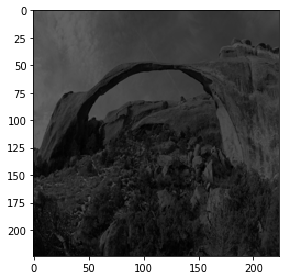

In [ ]:
imshow(imcolor)

In [ ]:
k=new_model.predict(imcolor)
k.shape

ValueError: ignored

In [ ]:
k=k.reshape(7,7,512)
k.shape